NAMA        : REZA PUTRI ANGGA
NPM         : 22083010006
MATA KULIAH : ANALISIS DATA EKSPLORATIF (A)

# Analisis Korelasi, Time Series Analysis, Hypotesis Testing, Dan Regresi

Melakukan Proses Pembacaan (Load) Dataset Covid-19 Yang Akan Di Analisis Lebih Lanjut

In [1]:
import pandas as pd

DataCovid = pd.read_csv("covid_19_indonesia_time_series_all.csv")
DataCovid

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.00,1.00
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31817,9/15/2022,ID-SA,Sulawesi Utara,37,0,0,37,52770,1213,50997,...,1.259638,14.01,19974.38,0.0,459.14,45.91,2.30%,96.64%,2.85,1.00
31818,9/15/2022,ID-SB,Sumatera Barat,13,0,3,10,104640,2371,102066,...,-0.850253,2.36,18959.11,0.0,429.59,42.96,2.27%,97.54%,6.50,1.00
31819,9/15/2022,ID-SS,Sumatera Selatan,16,0,1,15,82198,3376,78510,...,-3.216212,1.95,10002.74,0.0,410.83,41.08,4.11%,95.51%,3.20,1.00
31820,9/15/2022,ID-SU,Sumatera Utara,50,0,5,45,158866,3288,154924,...,2.191894,3.36,10680.15,0.0,221.04,22.10,2.07%,97.52%,1.92,1.00


Implementasikan Teknik-Teknik Analisis Korelasi, Time Series Analysis, Hypotesis Testing, Dan Regresi Untuk Menyelesaikan Berbagai Permasalahan Data Covid-19. 

Gunakan Field Date Dan New Cases.

# A. Time Series Analysis

1. Visualisasi Data Selama Rentang Beberapa Tahun

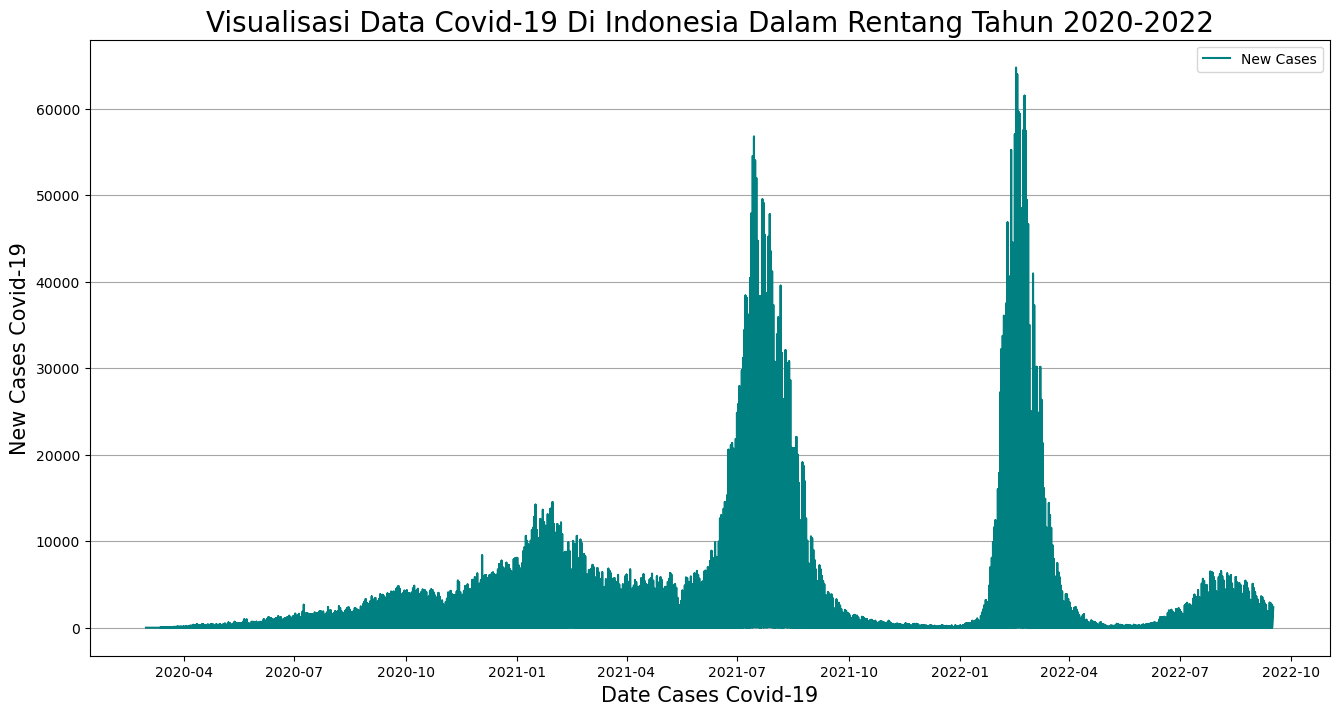

In [4]:
import matplotlib.pyplot as plt

#mengkonversi tipe data pada kolom "date" menjadi format datetime
DataCovid["Date"] = pd.to_datetime(DataCovid["Date"])

#visualisasi data covid-19 dalam rentang tahun
plt.figure(figsize = (16, 8))
plt.plot(DataCovid["Date"], DataCovid["New Cases"], color = "teal", label = "New Cases")
plt.grid(True, which = "major", axis = "y", linestyle = "-", color = "grey", alpha = 0.7)
plt.title("Visualisasi Data Covid-19 Di Indonesia Dalam Rentang Tahun 2020-2022", fontsize = 20)
plt.xlabel("Date Cases Covid-19", fontsize = 15)
plt.ylabel("New Cases Covid-19", fontsize = 15)
plt.legend()

plt.show()

2. Pengelompokan (Grouping) Data Time Series Berdasarkan Bulan

2.1 Grouping Data Berdasarkan Bulan Di Semua Tahun

In [44]:
#telah di lakukan pengubahan tipe data kolom "date" menjadi format datetime di langkah sebelumnya
#melakukan pembuatan kolom "month/bulan" dari ekstrasi data di kolom "date"
DataCovid["Month"] = DataCovid["Date"].dt.month

#melakukan pengelompokkan data
GroupingData = DataCovid.groupby("Month")["New Cases"].sum().reset_index()

#melakukan pengurutan data berdasarkan bulan
GroupingSort = GroupingData.sort_index()

#melakukan penampilkan grouping data
print("Di Tampilkan Grouping Data Berdasarkan Bulan Di Semua Tahun : ")
GroupingSort[["Month", "New Cases"]]

Di Tampilkan Grouping Data Berdasarkan Bulan Di Semua Tahun : 


,Month,New Cases
0,1,847513
1,2,2934624
2,3,1251927
3,4,398500
4,5,356933
5,6,843214
6,7,2799986
7,8,1797902
8,9,560379
9,10,305804


2.2 Grouping Data Pada Setiap Bulan Di Masing-Masing Tahun

In [51]:
#telah di lakukan pengubahan tipe data kolom "date" menjadi format datetime di langkah sebelumnya
#melakukan pembuatan kolom "month/bulan" dari ekstrasi data di kolom "date"
DataCovid["Month"] = DataCovid["Date"].dt.strftime("%m-%Y")

#melakukan pengelompokkan data
GroupingData = DataCovid.groupby("Month")["New Cases"].sum().reset_index()

#melakukan ekstrasi data dari "month" dan "year"
GroupingData["Year"] = GroupingData["Month"].str[-4:].astype(int)
GroupingData["MonthNum"] = GroupingData["Month"].str[:2].astype(int)

#melakukan pengurutan data berdasarkan bulan pada tahun tertentu
GroupingSort = GroupingData.sort_values(by = ["Year", "MonthNum"]).drop(["Year", "MonthNum"], 
                                                                        axis = 1)
GroupingSort.reset_index(drop = True, inplace = True)

#melakukan penampilkan grouping data
print("Di Tampilkan Grouping Data Pada Setiap Bulan Di Masing-Masing Tahun : ")
GroupingSort[["Month", "New Cases"]]

Di Tampilkan Grouping Data Pada Setiap Bulan Di Masing-Masing Tahun : 


,Month,New Cases
0,03-2020,2548
1,04-2020,17248
2,05-2020,33546
3,06-2020,60649
4,07-2020,105594
5,08-2020,133379
6,09-2020,224976
7,10-2020,247294
8,11-2020,258517
9,12-2020,410295


3. Pengelompokan (Grouping) Data Time Series Berdasarkan Hari

3.1 Grouping Data Berdasarkan Hari Di Semua Tahun

In [57]:
#telah di lakukan pengubahan tipe data kolom "date" menjadi format datetime di langkah sebelumnya
#melakukan pembuatan kolom "day/hari" dari ekstrasi data di kolom "date"
DataCovid["Day"] = DataCovid["Date"].dt.day
DataCovid["Day Name"] = DataCovid["Date"].dt.day_name()

#melakukan pengelompokkan data
#melakukan pengelompokkan data dari kolom "day name" dengan jumlah "new cases" disemua tahun
GroupingData = DataCovid.groupby("Day Name")["New Cases"].sum().reset_index()

#melakukan inisiasi "day name/nama hari"
NamaHari = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

#melakukan pengelompokkan data sesuai inisiasi "day name/nama hari"
GroupingData["Day Name"] = pd.Categorical(GroupingData["Day Name"], categories = NamaHari, ordered = True)

#melakukan pengurutan data berdasarkan hari
GroupingData.sort_values("Day Name", inplace = True)
GroupingData.reset_index(drop = True, inplace = True)

#melakukan penampilkan grouping data
print("Di Tampilkan Grouping Data Berdasarkan Hari Di Semua Tahun : ")
GroupingData[["Day Name", "New Cases"]]

Di Tampilkan Grouping Data Berdasarkan Hari Di Semua Tahun : 


,Day Name,New Cases
0,Monday,1448154
1,Tuesday,1844139
2,Wednesday,1975579
3,Thursday,2015644
4,Friday,1953851
5,Saturday,1896767
6,Sunday,1668219


3.2 Grouping Data Pada Setiap Hari Di Masing-Masing Tahun

In [61]:
#telah di lakukan pengubahan tipe data kolom "date" menjadi format datetime di langkah sebelumnya
#melakukan pengambilan data untuk "year/tahun" dari kolom "date"
DataCovid["Year"] = DataCovid["Date"].dt.year
#melakukan pembuatan kolom "day/hari" dari ekstrasi data di kolom "date"
DataCovid["Day"] = DataCovid["Date"].dt.day
DataCovid["Day Name"] = DataCovid["Date"].dt.day_name()

#melakukan pengelompokkan data
#melakukan pengelompokkan data dari kolom "day name" dengan jumlah "new cases" disemua tahun
GroupingData = DataCovid.groupby(["Year", "Day Name"])["New Cases"].sum().reset_index()

#melakukan inisiasi "day name/nama hari"
NamaHari = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

#melakukan pengelompkan data berdasarkan masing-masing "new cases" di setiap "day name", di masing-masing tahun
GroupingData["Day Name"] = pd.Categorical(GroupingData["Day Name"], categories = NamaHari, ordered = True)

#melakukan pengurutan data berdasarkan hari
GroupingData.sort_values(["Year", "Day Name"], inplace = True)
GroupingData.reset_index(drop = True, inplace = True)

#melakukan penampilkan grouping data
print("Di Tampilkan Grouping Data Berdasarkan Hari Di Masing-Masing Tahun : ")
GroupingData[["Year", "Day Name", "New Cases"]]

Di Tampilkan Grouping Data Berdasarkan Hari Di Masing-Masing Tahun : 


,Year,Day Name,New Cases
0,2020,Monday,183926
1,2020,Tuesday,202756
2,2020,Wednesday,224594
3,2020,Thursday,240008
4,2020,Friday,217853
5,2020,Saturday,218958
6,2020,Sunday,205951
7,2021,Monday,833710
8,2021,Tuesday,1004581
9,2021,Wednesday,1039297


3.3 Grouping Data Pada Setiap Hari Di Semua Tahun

In [63]:
#telah di lakukan pengubahan tipe data kolom "date" menjadi format datetime di langkah sebelumnya
#melakukan pengambilan "day/hari" dari kolom "date"
DataCovid["Day"] = DataCovid["Date"].dt.day

#melakukan pengelompokan data 
GroupingData = DataCovid.groupby("Day")["New Cases"].sum().reset_index()

#melakukan penampilan grouping data
print("Di Tampilkan Grouping Data Pada Setiap Hari Di Tahun 2020-2022 : ")
GroupingData

Di Tampilkan Grouping Data Pada Setiap Hari Di Tahun 2020-2022 : 


,Day,New Cases
0,1,365185
1,2,381198
2,3,425885
3,4,415384
4,5,429385
5,6,436006
6,7,407955
7,8,441681
8,9,439607
9,10,431179


4. Visualisasi Bersama Rata-Rata Mingguan Kasus Covid-19 Dan Harian

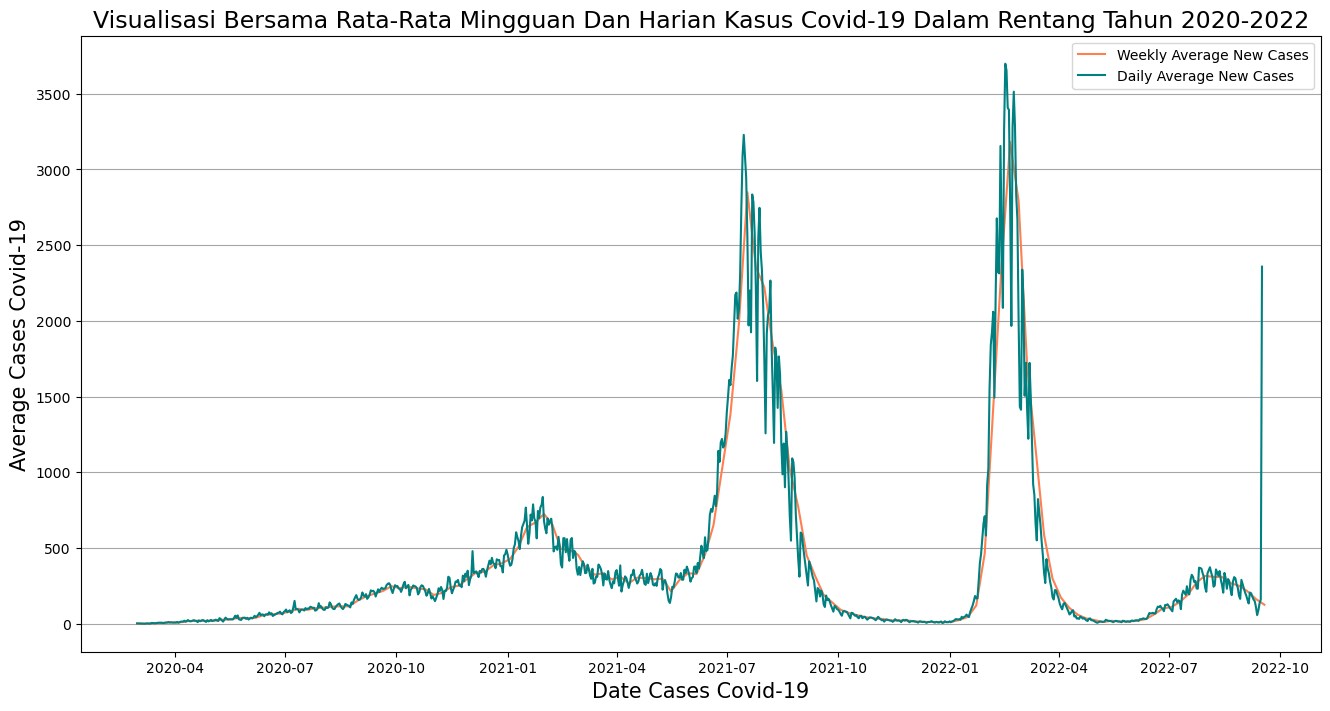

In [65]:
import matplotlib.pyplot as plt

#menghitung rata-rata mingguan dan harian kasus COVID-19
WeeklyAverageCases = DataCovid.resample("W-Sun", on = "Date")["New Cases"].mean()
DailyAverageCases = DataCovid.resample("D", on = "Date")["New Cases"].mean()

#visualisasi rata-rata mingguan dan harian kasus COVID-19
plt.figure(figsize=(16, 8))
plt.plot(WeeklyAverageCases.index, WeeklyAverageCases.values, label = "Weekly Average New Cases", 
         color = "coral")
plt.plot(DailyAverageCases.index, DailyAverageCases.values, label = "Daily Average New Cases", color = "teal")
plt.grid(True, which = "major", axis = "y", linestyle = "-", color = "grey", alpha = 0.7)
plt.title("Visualisasi Bersama Rata-Rata Mingguan Dan Harian Kasus Covid-19 Dalam Rentang Tahun 2020-2022", 
          fontsize = 17)
plt.xlabel("Date Cases Covid-19", fontsize = 15)
plt.ylabel("Average Cases Covid-19", fontsize = 15)
plt.legend()

plt.show()

# B. Hypotesis Testing

1. Gunakan T-Test Dan H0 = Rata-Rata Dari Kasus Harian Covid-19, H1 = Lebih Dari (>) Rata-Rata Dari Kasus Harian Covid-19

In [71]:
import numpy as np
from scipy.stats import norm

#melakukan perhitungan rata-rata "new cases"
AverageNewCases = DataCovid["New Cases"].mean()
print("Di Peroleh Nilai Rata-Rata Dari Kasus Harian Covid-19 Sebesar:", AverageNewCases)

#melakukan uji t dengan resampling
#melakukan perhitungan z-score dan p-value
MeanCases = DataCovid["New Cases"].mean()
StdCases = DataCovid["New Cases"].std()
Sample = len(DataCovid["New Cases"])

#distribusi normal sampel
NormalDist = np.random.normal(loc = MeanCases, scale = StdCases, size = (10000, Sample))

#perhitungan mean sample
MeanSample = NormalDist.mean(axis=1)

#melakukan perhitungan z-score
z_score = (MeanCases - MeanSample.mean()) / (MeanSample.std() / np.sqrt(Sample))

#melakukan perhitungan p-value
p_value = 2 * norm.cdf(-np.abs(z_score))

#menampilkan hasil
print("Di Peroleh Nilai Z-Score Sebesar:", z_score)
print("Di Peroleh Nilai P-Value Sebesar:", p_value)

#melakukan inisiasi alpha
alpha = 0.05

#melakukan inisiasi kondisi
if p_value < 0.05:
    print("H0 Di Tolak, T-Test Lebih Dari Rata-Rata Kasus Harian Covid-19")
else:
    print("H0 Gagal Di Tolak, T-Test Tidak Lebih Dari Rata-Rata Kasus Harian Covid-19")

Di Peroleh Nilai Rata-Rata Dari Kasus Harian Covid-19 Sebesar: 402.311388347684
Di Peroleh Nilai Z-Score Sebesar: 1.309481201840198
Di Peroleh Nilai P-Value Sebesar: 0.19037140129190233
H0 Gagal Di Tolak, T-Test Tidak Lebih Dari Rata-Rata Kasus Harian Covid-19


2. Simpulkan Apakah H0 Di Terima Atau Di Tolak

Di Karenakan Jika Menggunakan Uji-T Dengan Resampling Dan Di Dapatkan Nilai Z-Score Dan P Value. Dan Di Perlihatkan Bahwa Nilai P-ValueTidak Lebih Dari Nilai Rata-Rata Dari Kasus Harian Covid-19. Maka, Dapat Di Simpulkan H0 Gagal Di Tolak / H0 Di Terima. 

3. Gunakan Library Scipy Menggunakan Modul ttest_1samp

In [72]:
from scipy.stats import ttest_1samp

#melakukan perhitungan rata-rata harian kasus covid-19
AverageNewCases = DataCovid["New Cases"].mean()
print("Di Peroleh Nilai Rata-Rata Dari Kasus Harian Covid-19 Sebesar :", AverageNewCases)

#melakukan perhitungan ttest dan p-value
ttest, pvalue = ttest_1samp(DataCovid["New Cases"], AverageNewCases)
print("Di Peroleh Nilai T-Test Sebesar :", ttest)
print("Di Peroleh Nilai P-Value Sebesar :", pvalue)

#melakukan inisiasi alpha
alpha = 0.05

#melakukan inisiasi kondisi
if pvalue < 0.05:
    print("H0 Di Tolak, T-Test Lebih Dari Rata-Rata Kasus Harian Covid-19")
else:
    print("H0 Gagal Di Tolak, T-Test Tidak Lebih Dari Rata-Rata Kasus Harian Covid-19")

Di Peroleh Nilai Rata-Rata Dari Kasus Harian Covid-19 Sebesar : 402.311388347684
Di Peroleh Nilai T-Test Sebesar : 0.0
Di Peroleh Nilai P-Value Sebesar : 1.0
H0 Gagal Di Tolak, T-Test Tidak Lebih Dari Rata-Rata Kasus Harian Covid-19


Di Karenakan T-Test Tidak Lebih Dari Rata-Rata Kasus Harian Covid-19. Atau Bisa Di Sebutkan Bahwa T-Test (0.0) < Nilai Rata-Rata Kasus Harian Covid-19 (402.311). Maka, H0 Gagal Di Tolak Atau H0 Di Terima

# C. Analisis Korelasi

1. Gunakan Pearson Untuk Mendapatkan Nilai Koefisien Korelasi, Implementasikan Ke Dalam Python Secara Stratch

In [142]:
import math

#mengubah tipe data DateCases menjadi numerik dan menghitung jumlahnya sejak awal periode
DateCases = DataCovid["Date"]
DataCovid["DateCasesNumeric"] = (DateCases - DateCases.min()).dt.days

#inisiasi variabel x dan y
x = DataCovid["DateCasesNumeric"]
y = DataCovid["New Cases"]

def KorelasiPearson(x, y):
    """
    variable x -> date cases
    variable y -> new cases
    
    """
    
    #array
    x2 = [xi ** 2 for xi in x]
    y2 = [yi ** 2 for yi in y]
    xy = [xi * yi for xi, yi in zip(x,y)]
    n = len(x)
    
    #hasil perhitungan looping for
    total_x = sum(x)
    total_y = sum(y)
    total_x2 = sum(x2)
    total_y2 = sum(y2)
    total_xy = sum(xy)
    
    #perhitungan koefisien korelasi 
    r = (n * total_xy - total_x * total_y) / (math.sqrt((n * total_x2 - total_x ** 2) * (n * total_y2 - total_y 
                                                                                         ** 2)))
    
    #penampilan nilai koefisien korelasi pearson
    print("Di Peroleh Nilai Koefisien Korelasi Pearson :", r)

KorelasiPearson(x, y)

Di Peroleh Nilai Koefisien Korelasi Pearson : 0.03918944827301286


#  D. Regresi Dan Evaluasi

1. Cari Model Regresi Yang Tepat Untuk Menyelesaikan Data Harian Covid-19 Di Indonesia

In [168]:
DateCases = DataCovid["Date"]
DataCovid["DateCasesNumeric"] = (DateCases - DateCases.min()).dt.days

#inisiasi variabel x dan y
x = DataCovid["DateCasesNumeric"]
y = DataCovid["New Cases"]

def Regression(x, y):
    
    #array dan perhitungannya
    x2 = [xi ** 2 for xi in x]
    y2 = [yi ** 2 for yi in y]
    xy = [xi * yi for xi, yi in zip(x, y)]  

    #total perhitungan dari array
    total_x = sum(x)
    total_y = sum(y)
    total_x2 = sum(x2) 
    total_y2 = sum(y2)  
    total_xy = sum(xy)
    
    #perhitungan nilai a dan b
    a = ((total_y * total_x2) - (total_x * total_xy)) / ((len(x) * total_x2) - (total_x ** 2))
    b = ((len(x) * total_xy) - (total_x * total_y)) / ((len(x) * total_x2) - (total_x ** 2))

    #penampilan nilai a dan b
    print("Di Peroleh Nilai A :", a)
    print("Di Peroleh Nilai B :", b)
    
    #perhitungan y_predict
    y_predict = [a + b * xi for xi in x]  

    #penampilan nilai y_predict
    print("Di Peroleh Nilai y_predict :", y_predict)
    
Regression(x, y)

Di Peroleh Nilai A : 238.19841608750625
Di Peroleh Nilai B : 0.346365702603417
Di Peroleh Nilai y_predict : [238.19841608750625, 238.54478179010965, 238.54478179010965, 238.54478179010965, 238.8911474927131, 238.8911474927131, 238.8911474927131, 238.8911474927131, 239.2375131953165, 239.2375131953165, 239.2375131953165, 239.2375131953165, 239.5838788979199, 239.5838788979199, 239.5838788979199, 239.5838788979199, 239.93024460052334, 239.93024460052334, 239.93024460052334, 239.93024460052334, 239.93024460052334, 240.27661030312674, 240.27661030312674, 240.27661030312674, 240.27661030312674, 240.27661030312674, 240.62297600573015, 240.62297600573015, 240.62297600573015, 240.62297600573015, 240.62297600573015, 240.62297600573015, 240.9693417083336, 240.9693417083336, 240.9693417083336, 240.9693417083336, 240.9693417083336, 240.9693417083336, 241.315707410937, 241.315707410937, 241.315707410937, 241.315707410937, 241.315707410937, 241.315707410937, 241.315707410937, 241.66207311354043, 241

2. Evaluasi Model Regresi Menggunakan MAPE

In [175]:
DateCases = DataCovid["Date"]
DataCovid["DateCasesNumeric"] = (DateCases - DateCases.min()).dt.days

#inisiasi variabel x dan y
x = DataCovid["DateCasesNumeric"]
y = DataCovid["New Cases"]

def Regression(x, y):
    
    #array dan perhitungannya
    x2 = [xi ** 2 for xi in x]
    y2 = [yi ** 2 for yi in y]
    xy = [xi * yi for xi, yi in zip(x, y)]  

    #total perhitungan dari array
    total_x = sum(x)
    total_y = sum(y)
    total_x2 = sum(x2) 
    total_y2 = sum(y2)  
    total_xy = sum(xy)
    
    #perhitungan nilai a dan b
    a = ((total_y * total_x2) - (total_x * total_xy)) / ((len(x) * total_x2) - (total_x ** 2))
    b = ((len(x) * total_xy) - (total_x * total_y)) / ((len(x) * total_x2) - (total_x ** 2))

    #perhitungan y_predict
    y_predict = [a + b * xi for xi in x]  

    #perhitungan MAPE
    mape = []
    for i in range(len(x)):
        mape.append((abs(y[i] - y_predict[i]) / y_predict[i]) * 100)
    value_mape = sum(mape) / len(x)
    print("Di Peroleh Nilai MAPE Sebesar : {:.5f}%".format(value_mape))

Regression(x, y)

Di Peroleh Nilai MAPE Sebesar : 147.50375%


3. Implementasikan Model Regresi Dan Evaluasi Menggunakan Python Secara Stratch

In [178]:
DateCases = DataCovid["Date"]
DataCovid["DateCasesNumeric"] = (DateCases - DateCases.min()).dt.days

#inisiasi variabel x dan y
x = DataCovid["DateCasesNumeric"]
y = DataCovid["New Cases"]

def Regression(x, y):
    
    #array dan perhitungannya
    x2 = [xi ** 2 for xi in x]
    y2 = [yi ** 2 for yi in y]
    xy = [xi * yi for xi, yi in zip(x, y)]  

    #total perhitungan dari array
    total_x = sum(x)
    total_y = sum(y)
    total_x2 = sum(x2) 
    total_y2 = sum(y2)  
    total_xy = sum(xy)
    
    #perhitungan nilai a dan b
    a = ((total_y * total_x2) - (total_x * total_xy)) / ((len(x) * total_x2) - (total_x ** 2))
    b = ((len(x) * total_xy) - (total_x * total_y)) / ((len(x) * total_x2) - (total_x ** 2))

    #penampilan nilai a dan b
    print("Di Peroleh Nilai A :", a)
    print("Di Peroleh Nilai B :", b)
    
    #perhitungan y_predict
    y_predict = [a + b * xi for xi in x]  

    #penampilan nilai y_predict
    print("Di Peroleh Nilai y_predict:", y_predict)

    #perhitungan MAPE
    mape = []
    for i in range(len(x)):
        mape.append((abs(y[i] - y_predict[i]) / y_predict[i]) * 100)
    value_mape = sum(mape) / len(x)
    print("Di Peroleh Nilai MAPE Sebesar : {:.5f}%".format(value_mape))

Regression(x, y)

Di Peroleh Nilai A : 238.19841608750625
Di Peroleh Nilai B : 0.346365702603417
Di Peroleh Nilai y_predict: [238.19841608750625, 238.54478179010965, 238.54478179010965, 238.54478179010965, 238.8911474927131, 238.8911474927131, 238.8911474927131, 238.8911474927131, 239.2375131953165, 239.2375131953165, 239.2375131953165, 239.2375131953165, 239.5838788979199, 239.5838788979199, 239.5838788979199, 239.5838788979199, 239.93024460052334, 239.93024460052334, 239.93024460052334, 239.93024460052334, 239.93024460052334, 240.27661030312674, 240.27661030312674, 240.27661030312674, 240.27661030312674, 240.27661030312674, 240.62297600573015, 240.62297600573015, 240.62297600573015, 240.62297600573015, 240.62297600573015, 240.62297600573015, 240.9693417083336, 240.9693417083336, 240.9693417083336, 240.9693417083336, 240.9693417083336, 240.9693417083336, 241.315707410937, 241.315707410937, 241.315707410937, 241.315707410937, 241.315707410937, 241.315707410937, 241.315707410937, 241.66207311354043, 241.